# Simple CEM on Continuous Bandits

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import bisect

## Main Idea
This code is aimed to observe whether the CEM method proposed in the slides will strictly improve in a "$1 - \rho$ quantile" sense. To check this, we created a continuous bandit depicted in Figure 1 (在下面~).

### Figure 1. (code of plotting it, and the resulting figure is plotted below)

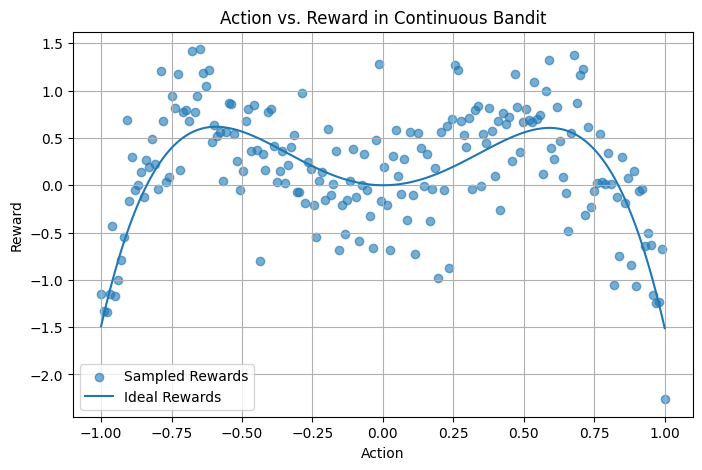

In [2]:
reward_disturb = np.random.default_rng()
reward_disturb_std = 0.5
def c_bandit(action, reward_disturb_std=0):
    reward = reward_disturb.normal(-5 * action**4 + 3.5 * action**2 - 0.01 * action, reward_disturb_std)
    return reward

# Generate actions in the range [-1, 1]
actions = np.linspace(-1, 1, 200)
rewards = [c_bandit(a, reward_disturb_std) for a in actions]

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(actions, rewards, alpha=0.6, label="Sampled Rewards")
plt.plot(actions, [c_bandit(a) for a in actions], label="Ideal Rewards")
plt.title("Action vs. Reward in Continuous Bandit")
plt.xlabel("Action")
plt.ylabel("Reward")
plt.grid(True)
plt.legend()
plt.show()

### Figure 2. Result
If the iteration failed to improve, it will output "Uh-oh😢", then stop the algorithm. (Also, it may take some time to run, because I tried to sample a huge number, or INFINITE, actions).

gamma on iteration 0: 0.5740594761859601
gamma on iteration 1: 0.5869745388089741
its corresponding max_rho: 0.12340901371211266
gamma on iteration 2: 0.5877038572806158
its corresponding max_rho: 0.10146301127366797
gamma on iteration 3: 0.5884870772539368
its corresponding max_rho: 0.10158523350947035
gamma on iteration 4: 0.5898015836339306
its corresponding max_rho: 0.1026656780739642
gamma on iteration 5: 0.5926085536472443
its corresponding max_rho: 0.10591656732406307
gamma on iteration 6: 0.6012684480776067
its corresponding max_rho: 0.12340312482256943
gamma on iteration 7: 0.6164918871676828
its corresponding max_rho: 0.2936686992965222
gamma on iteration 8: 0.6184095006949735
its corresponding max_rho: 0.9172839908093323


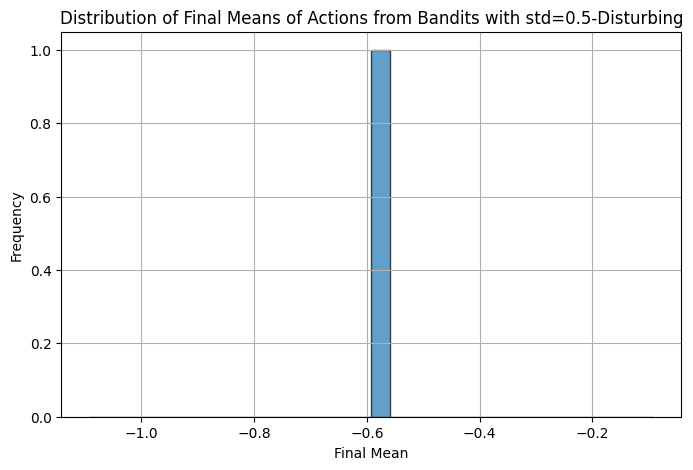

In [5]:
p = 0.1  # Pick up the top p-quantile
final_means = []
max_rhos = []
for i in range(1):  # How many experiments to run
    mu = 0
    sigma = 1
    actions_generator = np.random.default_rng()
    previous_gamma = -99999
    t = 0
    while sigma >= 0.001:
        # print("mu:", mu, "sigma:", sigma)
        sampled_actions = actions_generator.normal(mu, sigma, 9000000)  # sample INFINITE actions
        obtained_rewards = c_bandit(sampled_actions)
        sorted_obtained_rewards = sorted(obtained_rewards)
        gamma = np.quantile(sorted_obtained_rewards, 1 - p)  # This is the threshold
        
        print(f"gamma on iteration {t}:", gamma)
        if t > 0:
            max_rho = 1 - bisect.bisect_right(sorted_obtained_rewards, previous_gamma) / (9000000 - 1)
            max_rhos.append(max_rho)
            if (previous_gamma > gamma):
                print("Uh-oh😢")
                break
            print(f"its corresponding max_rho:", max_rho)
        elite_actions = sampled_actions[obtained_rewards >= gamma]

        # Let's Update~~~~
        mu = np.mean(elite_actions)
        sigma = np.std(elite_actions)
        previous_gamma = gamma
        t = t + 1
    final_means.append(mu)

# Plot the histogram of final_means
plt.figure(figsize=(8, 5))
plt.hist(final_means, bins=30, edgecolor='black', alpha=0.7)
plt.title(f"Distribution of Final Means of Actions from Bandits with std={reward_disturb_std}-Disturbing")
plt.xlabel("Final Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Maximum Requirements of rho to Improve the Reward Quantile')

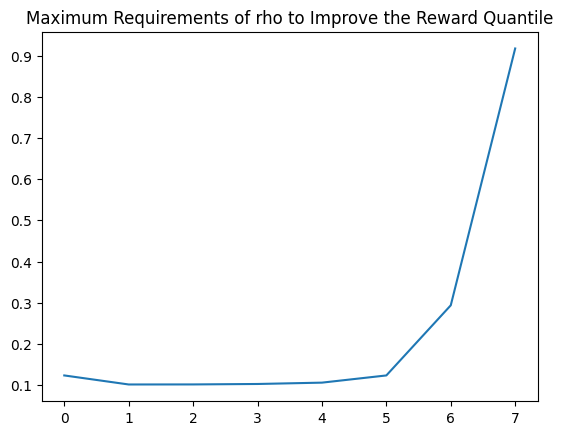

In [6]:
import matplotlib.pyplot as plt
plt.plot(max_rhos)
plt.title("Maximum Requirements of rho to Improve the Reward Quantile")